# KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [66]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [67]:

# Scale Data
scaler = StandardScaler()
# Fit & transform data.


X = scaler.fit_transform(X)

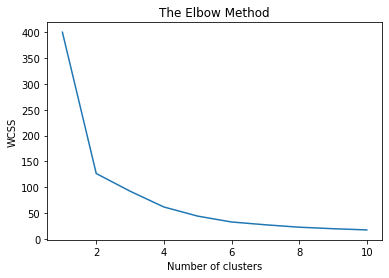

In [68]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_dh = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# The output is a label to each point that shows to which cluster they belong
# Note: This example we have 2 clusters 
y_kmeans = kmeans_dh.fit_predict(X)

In [70]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [72]:
# Cluster centeriods
print (kmeans_dh.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


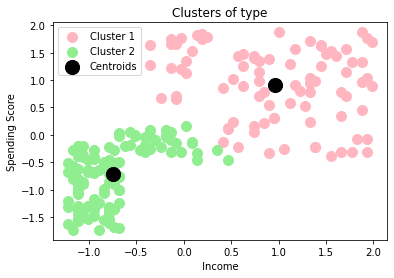

In [73]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'lightpink', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightgreen', label = 'Cluster 2')
plt.scatter(kmeans_dh.cluster_centers_[:, 0], kmeans_dh.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of type')
plt.xlabel(' Income ')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [74]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [75]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
def replace_type(type):
   
    if type == 'dog':
        return 1
    elif type == 'horse':
        return 0
 

df_dh['type'] = df_dh['type'].apply(lambda x: replace_type(x))

In [76]:
def replace(type, kmean_prid ):
 
 return type == kmean_prid



 



In [77]:
df_dh['ac']=(df_dh.apply(lambda x: replace(x.type,x.kmean_prid), axis=1))
df_dh

,height,weight,target,type,kmean_prid,ac
0,27.0,71.0,0.0,1,1,True
1,27.0,92.0,0.0,1,1,True
2,32.0,47.0,0.0,1,1,True
3,30.0,90.0,0.0,1,1,True
4,28.0,91.0,0.0,1,1,True
...,...,...,...,...,...,...
195,55.0,140.0,1.0,0,0,True
196,82.0,179.0,1.0,0,0,True
197,46.0,132.0,1.0,0,0,True
198,56.0,89.0,1.0,0,1,False


In [78]:
# Calculate the number of correct predictions
df_dh.ac.value_counts()

True     187
False     13
Name: ac, dtype: int64

In [79]:
d = df_dh['type']

In [80]:
# Compute Accuracy Score of KMean Labels with True Labels


from sklearn.metrics import accuracy_score

accuracy_score(d ,y_kmeans)*100


93.5

# Seattle Weather KMeans Challenge

In [50]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [51]:

# Scale Data
scaler = StandardScaler()
# Fit & transform data.


X = scaler.fit_transform(X)

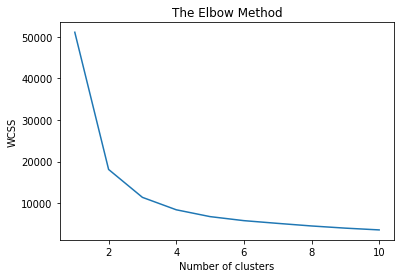

In [52]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Apply KMeans and Plot KMeans Results and Actual Results

kmeans_dh = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# The output is a label to each point that shows to which cluster they belong
# Note: This example we have 2 clusters 
y_kmeans = kmeans_dh.fit_predict(X)

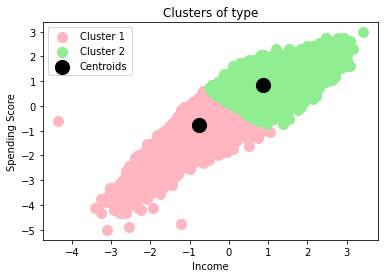

In [55]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'lightpink', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightgreen', label = 'Cluster 2')
plt.scatter(kmeans_dh.cluster_centers_[:, 0], kmeans_dh.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of type')
plt.xlabel(' Income ')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [56]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,0
1,1948-01-02,0.59,45,36,True,0
2,1948-01-03,0.42,45,35,True,0
3,1948-01-04,0.31,45,34,True,0
4,1948-01-05,0.17,45,32,True,0
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,0
25547,2017-12-11,0.00,49,29,False,0
25548,2017-12-12,0.00,46,32,False,0
25549,2017-12-13,0.00,48,34,False,0


In [57]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
def replace_rain(rain):
   
    if rain == True:
        return 1
    elif rain == False:
        return 0
 

df_sea['rain'] = df_sea['rain'].apply(lambda x: replace_rain(x))

In [58]:
df_sea['rain'] = df_sea['rain'].fillna(df_sea['rain']).median()

In [59]:
df_sea['rain'] = df_sea['rain'].astype(int)

In [60]:

def replace(rain, kmean_prid ):
 
 return rain == kmean_prid

In [61]:
df_sea['eq']=(df_sea.apply(lambda x: replace(x.rain,x.kmean_prid), axis=1))
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid,eq
0,1948-01-01,0.47,51,42,0,0,True
1,1948-01-02,0.59,45,36,0,0,True
2,1948-01-03,0.42,45,35,0,0,True
3,1948-01-04,0.31,45,34,0,0,True
4,1948-01-05,0.17,45,32,0,0,True
...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0,0,True
25547,2017-12-11,0.00,49,29,0,0,True
25548,2017-12-12,0.00,46,32,0,0,True
25549,2017-12-13,0.00,48,34,0,0,True


In [62]:
df_sea['kmean_prid'].value_counts()

0    13616
1    11935
Name: kmean_prid, dtype: int64

In [63]:
# Calculate the number of correct predictions
df_sea['eq'].value_counts()

True     13616
False    11935
Name: eq, dtype: int64

In [64]:
Z = df_sea['rain']

In [65]:

# Compute Accuracy Score of KMean Labels with True Labels
from sklearn.metrics import accuracy_score
accuracy_score(Z , y_kmeans)*100

53.28949943250754

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

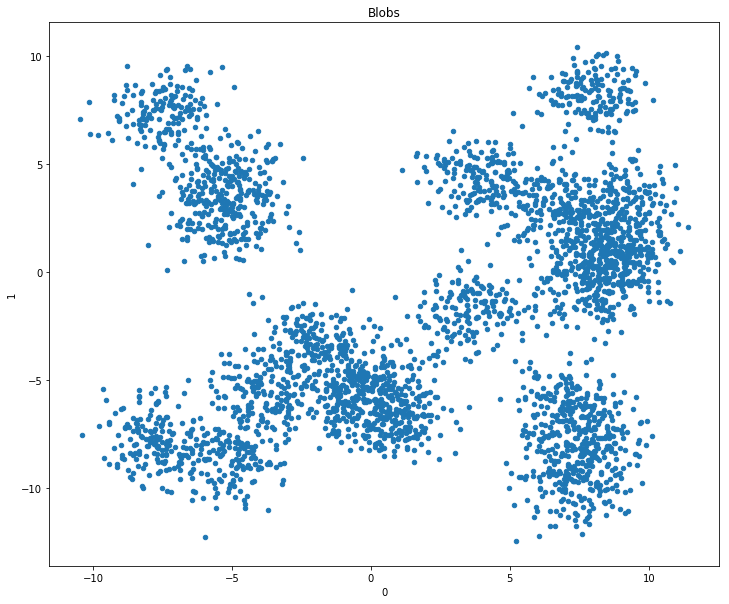

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Scale Data

# Fit & transform data.


In [ ]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results


In [ ]:
# Plot the clusters 